In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [46]:
df = pd.read_excel("Global_Superstore2.xlsx")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [48]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [49]:
df = df.drop(["Order ID","Row ID","Customer ID","Customer Name","Product ID","Postal Code"] , axis = 1)
df.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,2012-07-31,2012-07-31,Same Day,Consumer,New York City,New York,United States,US,East,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,2013-02-05,2013-02-07,Second Class,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,2013-10-17,2013-10-18,First Class,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,2013-01-28,2013-01-30,First Class,Home Office,Berlin,Berlin,Germany,EU,Central,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,2013-11-05,2013-11-06,Same Day,Consumer,Dakar,Dakar,Senegal,Africa,Africa,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [50]:
df.isnull().sum()

Order Date        0
Ship Date         0
Ship Mode         0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [51]:
df["Ship Mode"].unique()

array(['Same Day', 'Second Class', 'First Class', 'Standard Class'],
      dtype=object)

In [52]:
df["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [53]:
df["Category"].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

In [54]:
df["Order Priority"].unique()

array(['Critical', 'Medium', 'High', 'Low'], dtype=object)

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
encoder = LabelEncoder()

In [57]:
df["Ship Mode"] = encoder.fit_transform(df["Ship Mode"])
df["Segment"] = encoder.fit_transform(df["Segment"])
df["Category"] = encoder.fit_transform(df["Category"])
df["Order Priority"] = encoder.fit_transform(df["Order Priority"])

In [58]:
df.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,2012-07-31,2012-07-31,1,0,New York City,New York,United States,US,East,2,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,0
1,2013-02-05,2013-02-07,2,1,Wollongong,New South Wales,Australia,APAC,Oceania,0,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,0
2,2013-10-17,2013-10-18,0,0,Brisbane,Queensland,Australia,APAC,Oceania,2,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,3
3,2013-01-28,2013-01-30,0,2,Berlin,Berlin,Germany,EU,Central,2,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,3
4,2013-11-05,2013-11-06,1,0,Dakar,Dakar,Senegal,Africa,Africa,2,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,0


<AxesSubplot:xlabel='Order Priority', ylabel='count'>

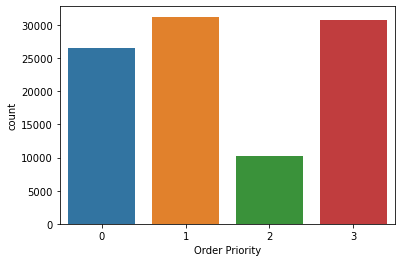

In [59]:
sns.countplot(x="Ship Mode", data=df)
sns.countplot(x="Segment", data=df)
sns.countplot(x="Category", data=df)
sns.countplot(x="Order Priority", data=df)

In [62]:
Rem_columns = ["Market", "Region", "City", "State", "Country", "Product Name", "Sub-Category"]
df = pd.get_dummies(df, columns=Rem_columns)


In [63]:
df['shipping_time'] = (df['Ship Date'] - df['Order Date']).dt.days

In [64]:
df.head()

,Order Date,Ship Date,Ship Mode,Segment,Category,Sales,Quantity,Discount,Profit,Shipping Cost,...,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,shipping_time
0,2012-07-31,2012-07-31,1,0,2,2309.650,7,0.0,762.1845,933.57,...,0,0,0,0,0,0,0,0,0,0
1,2013-02-05,2013-02-07,2,1,0,3709.395,9,0.1,-288.7650,923.63,...,0,0,0,0,0,0,0,0,0,2
2,2013-10-17,2013-10-18,0,0,2,5175.171,9,0.1,919.9710,915.49,...,0,0,0,0,0,1,0,0,0,1
3,2013-01-28,2013-01-30,0,2,2,2892.510,5,0.1,-96.5400,910.16,...,0,0,0,0,0,1,0,0,0,2
4,2013-11-05,2013-11-06,1,0,2,2832.960,8,0.0,311.5200,903.04,...,0,0,0,0,0,0,0,0,0,1


In [65]:
df=df.drop(["Order Date","Ship Date"], axis=1)


In [66]:
X = df.drop("Order Priority", axis=1)
y = df["Order Priority"]


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [68]:
X_train.shape

(35903, 8711)

In [69]:
X_test.shape

(15387, 8711)

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler = MinMaxScaler()

In [72]:
column_name = ['Sales','Profit','Shipping Cost','Ship Mode','Category','Segment']

In [73]:
df[column_name]=scaler.fit_transform(df[column_name])

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [75]:
# Train a decision tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [76]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [77]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7068954312081628
